In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# See the shape of the data (in rows, columns)
print ("rows, columns:", df.shape)

# List all column names
print("Columns:", df.columns.tolist())

# Get a summary of data types and non-null counts
df.info()


rows, columns: (2823, 25)
Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEA

In [5]:
# Count missing values in each column
df.isnull().sum().sort_values(ascending=False)

,0
ADDRESSLINE2,2521
STATE,1486
TERRITORY,1074
POSTALCODE,76
SALES,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
ORDERNUMBER,0
MONTH_ID,0


In [6]:
# Drop columsn with too many missing values
df = df.drop(['ADDRESSLINE2', 'STATE', 'TERRITORY'], axis=1)

In [8]:
# Get a summary stat for all numeric columns
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [12]:
# Which product line generates the most sales

product_sales = df.groupby('PRODUCTLINE') ['SALES'].sum().sort_values(ascending=False)
print(product_sales)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


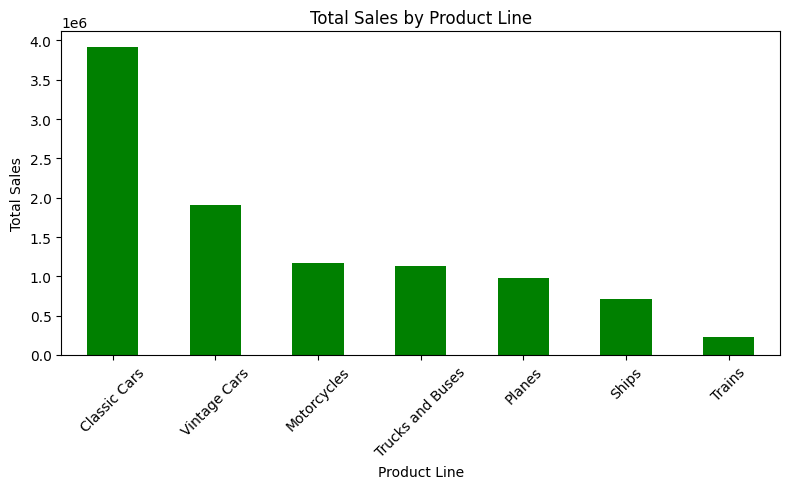

In [16]:
# Import the visualization library

import matplotlib.pyplot as plt

# Create a bar chart

product_sales.plot(kind='bar', color='green', figsize=(8,5))

# Add chart labels and titles

plt.title('Total Sales by Product Line') # Chart title
plt.xlabel('Product Line') # X-axis label
plt.ylabel('Total Sales') # Y-axis label

# Adjust sppearance

plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.tight_layout() # Fix spacing so labels don't get cut off
plt.show() # Display the chart

### Sales by Product Line: Key Insight

**Classic Cars** are the top selling product line, generating nearly double the sales of the next highest category, Vintage Cars. This suggests Classic Cars are the primary revenue driver for the business.

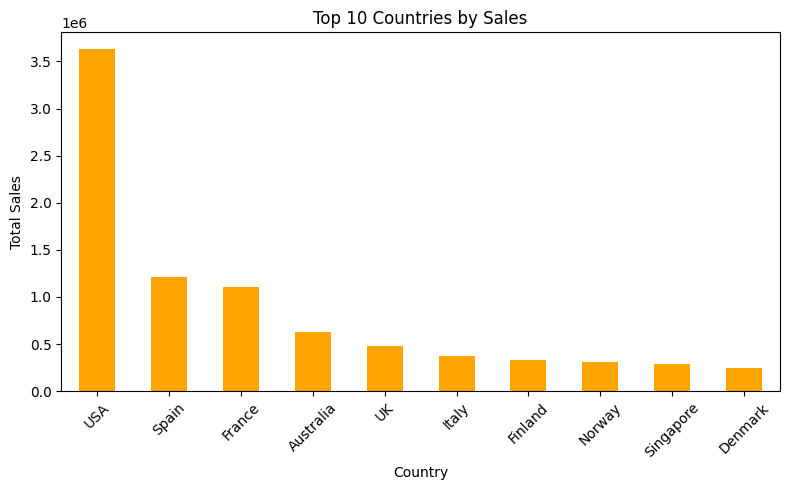

In [17]:
# Calculate total sales by country

country_sales = df.groupby('COUNTRY') ['SALES'].sum().sort_values(ascending=False)

# Visualize the top 10 countries

country_sales.head(10).plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Countries by Sales ###

**Key Insight**:
The US leads all coutnries in total sales, followed by Spain and France. This highlights the importance of the US market for the business.

In [20]:
# Analyze & visualize monthly sales trends

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) # Convert the order date column to datetime

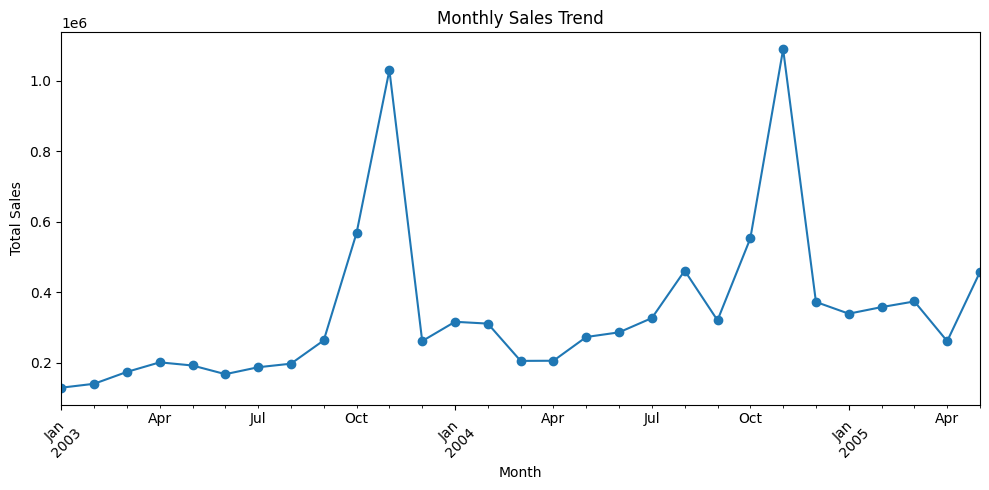

In [21]:
# Calculate & plot monthly sales

montly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
montly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Sales Trend ###

**Key Insight:**
The monthly sales trend reveals strong seasonality, with significant sales spikes occurring in October and November each year. This pattern suggests that the business experiences peak demand during the fall, likely due to holiday shopping or annual promotions. Understanding this trend can help the company optimize inventory and marketing strategies around these high-sales months.

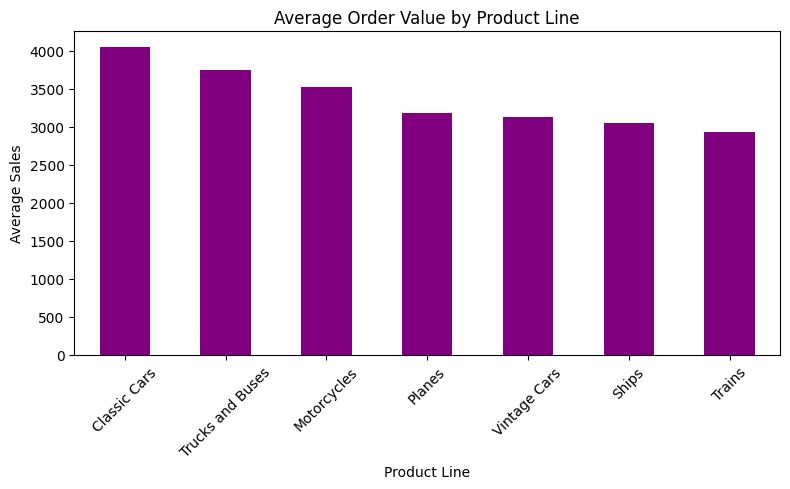

In [25]:
# Analyze avg order value by product line

aov_by_product = df.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False)
aov_by_product.plot(kind='bar', color='purple', figsize=(8,5))
plt.title('Average Order Value by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Order Value by Product Line ###

**Key Insight:**
Classic Cars has the highest average order value among all product lines, followed by Trucks and Buses and Motorcycles. This suggests that customers purchasing Classic Cars tend to spend more per order, indicating a premium or high-value segment for the business.

### Final Summary & Recommendations ###

**Final Summary:**
1. Classic Cars is the top-selling product line, generating $3.9M in sales-almost double that of Vintage Cars. It also boasts the highest average order value.

2. The United States is the largest market, accounting for over $1.5M in sales, followed by Germany and France.

3. Sales peak in October and November each year, indicating strong seasonality likely driven by holiday promotions.

**Recommendations:**
1. Focus marketing and inventory planning on Classic Cars, especially in the US, during peak sales months.

2. Explore strategies to boost average order value in lower-performing product lines.

3. Consider further analysis on customer segments or promotional effectiveness for deeper insights.

*Limitations:* This analysis is based on historical sales data from Kaggle. Future trends may vary due to market changes.
